In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve,roc_curve
!pip install optuna
import optuna
import warnings
# warnings.filterwarnings('ignore')
import gdown

In [ ]:
gdown.download('https://drive.google.com/uc?id=13UpVE8HSB_ws6qYh6Ts3oDMUfWWzPuLg', 'Loan_default.csv', quiet=False)
gdown.download_folder(f'https://drive.google.com/drive/folders/15Sd-UXPdhQd1jCOCPnSRVJ5lDTE9XRQp', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=13UpVE8HSB_ws6qYh6Ts3oDMUfWWzPuLg
To: /content/Loan_default.csv
100%|██████████| 24.8M/24.8M [00:00<00:00, 104MB/s]
Retrieving folder contents


Processing file 1eZlOkfYHVtXSIErkRQyrtq2HvczRJ032 Loan Default Prediction report.docx
Processing file 1zKwsuAQnBMR8xyQSU0hAg6qcVUD8u3uy loan_prediction_app.py


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1eZlOkfYHVtXSIErkRQyrtq2HvczRJ032
To: /content/Loan Prediction/Loan Default Prediction report.docx
100%|██████████| 17.7k/17.7k [00:00<00:00, 27.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1zKwsuAQnBMR8xyQSU0hAg6qcVUD8u3uy
From (redirected): https://drive.google.com/uc?id=1zKwsuAQnBMR8xyQSU0hAg6qcVUD8u3uy&confirm=t&uuid=55d93697-2027-424f-a0a7-f61bdc0f24e2
To: /content/Loan Prediction/loan_prediction_app.py
100%|██████████| 4.20k/4.20k [00:00<00:00, 8.27MB/s]
Download completed


['/content/Loan Prediction/Loan Default Prediction report.docx',
 '/content/Loan Prediction/loan_prediction_app.py']

In [ ]:
data = pd.read_csv("/content/Loan_default.csv")
df = data.copy()
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


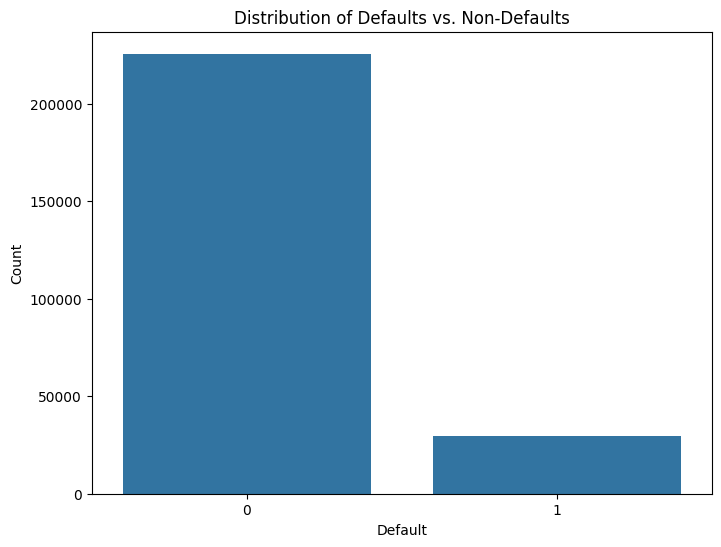

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=df)
plt.title('Distribution of Defaults vs. Non-Defaults')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

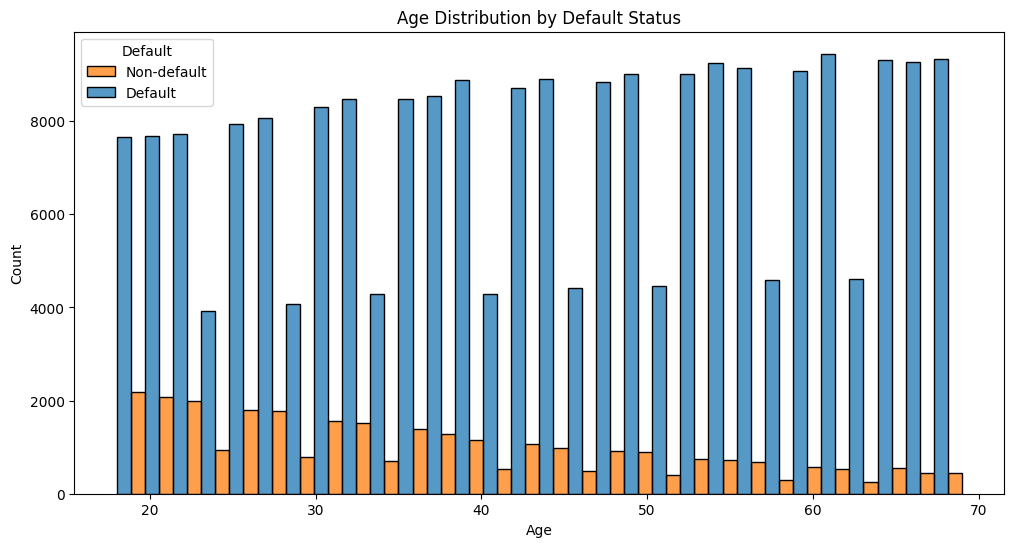

In [ ]:
# Defolt Status üzrə Yaş Bölgüsü üçün Yan-yana Bar Plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Default', multiple="dodge", bins=30)
plt.title('Age Distribution by Default Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-default', 'Default'])
plt.show()

<ipython-input-32-cd78a86512af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Default', y='CreditScore', data=df, palette='Set1')


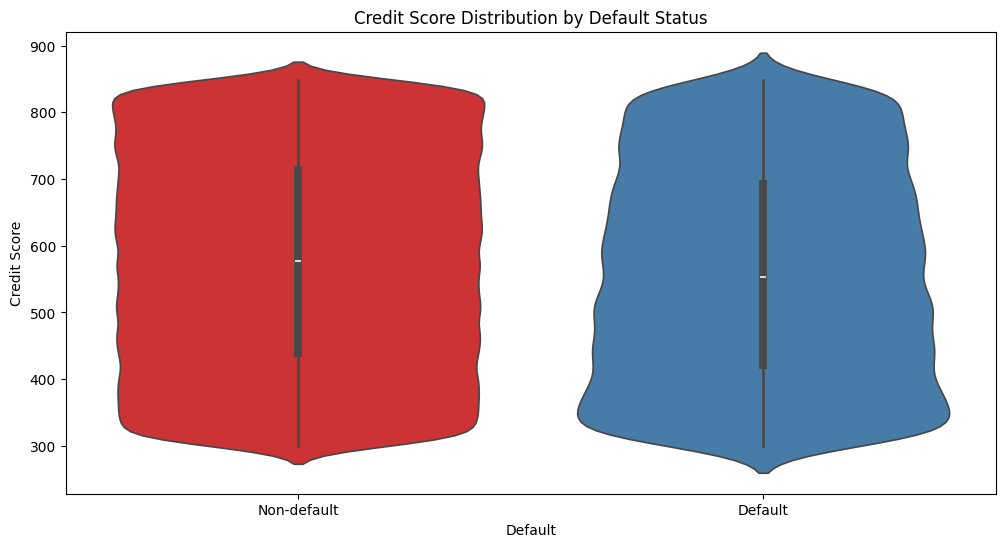

In [ ]:
#Defolt Status üzrə Kredit Hesabı üçün Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Default', y='CreditScore', data=df, palette='Set1')
plt.title('Credit Score Distribution by Default Status')
plt.xlabel('Default')
plt.ylabel('Credit Score')
plt.xticks([0, 1], ['Non-default', 'Default'])
plt.show()

<ipython-input-33-807a9b71c431>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_income = df.groupby('IncomeBin')['Default'].mean().reset_index()
<ipython-input-33-807a9b71c431>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IncomeBin', y='Default', data=default_rate_by_income, palette='Blues_d')


([0, 1, 2, 3, 4],
 [Text(0, 0, '(14865.001, 41999.8]'),
  Text(1, 0, '(41999.8, 68999.6]'),
  Text(2, 0, '(68999.6, 95999.4]'),
  Text(3, 0, '(95999.4, 122999.2]'),
  Text(4, 0, '(122999.2, 149999.0]')])

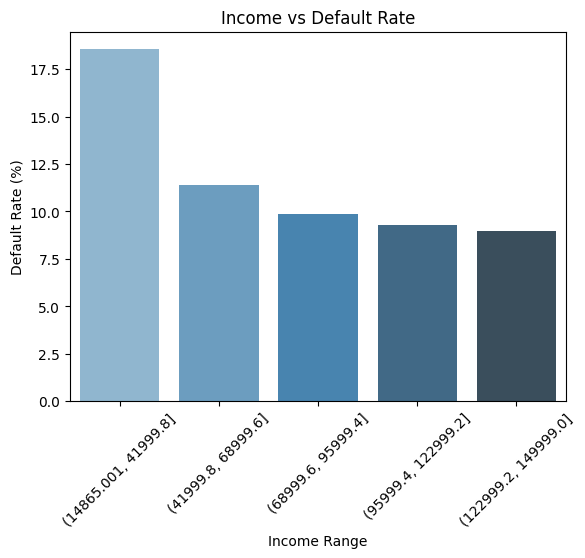

In [ ]:
# Gəlir qruplarının yaradılması (binning)
df['IncomeBin'] = pd.cut(df['Income'], bins=5)

# Hər bir gəlir qrupu üzrə defolt edənlərin faizini hesablayırıq
default_rate_by_income = df.groupby('IncomeBin')['Default'].mean().reset_index()
default_rate_by_income['Default'] *= 100  # Faizə çevirmək üçün

# Bar qrafiki yaratmaq
sns.barplot(x='IncomeBin', y='Default', data=default_rate_by_income, palette='Blues_d')
plt.xlabel('Income Range')
plt.ylabel('Default Rate (%)')
plt.title('Income vs Default Rate')
plt.xticks(rotation=45)

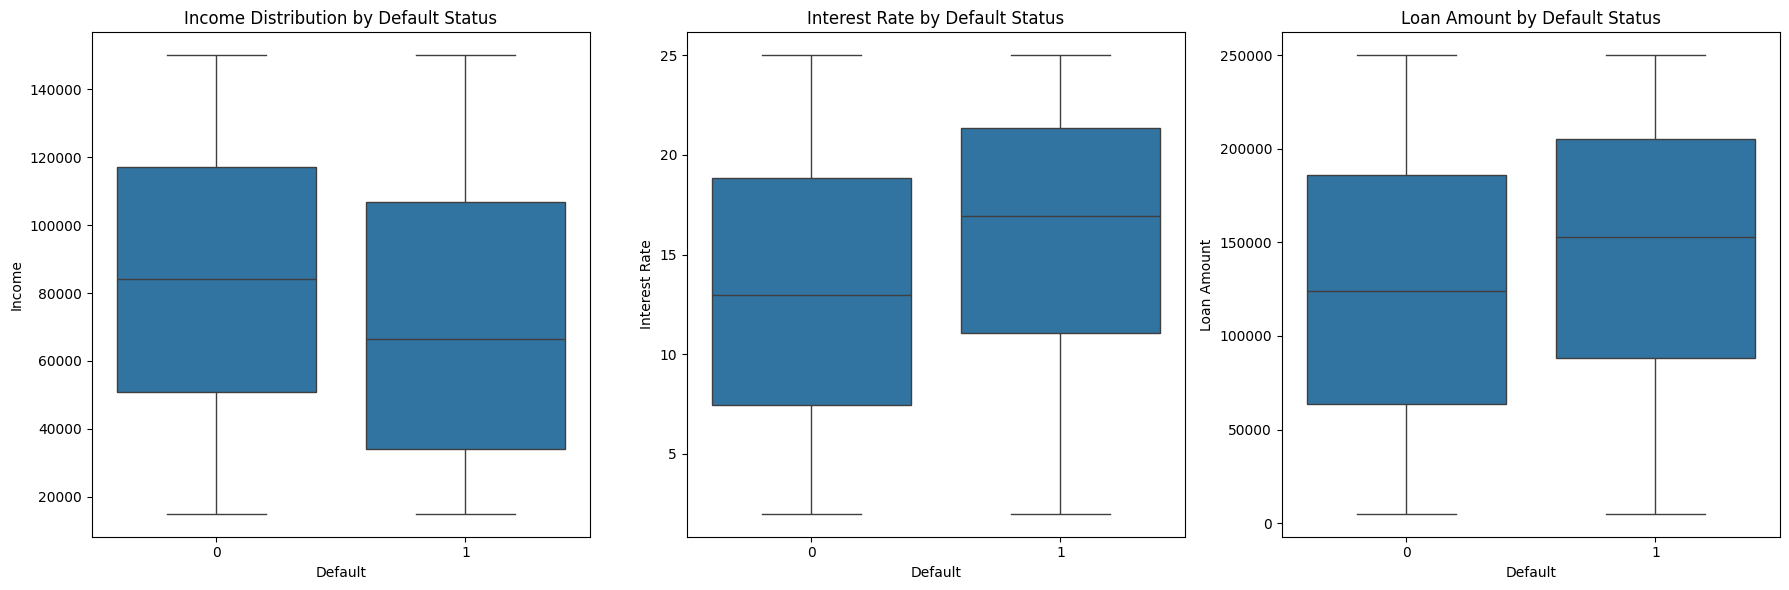

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Income Distribution by Default Status
sns.boxplot(ax=axes[0], x='Default', y='Income', data=df)
axes[0].set_title('Income Distribution by Default Status')
axes[0].set_xlabel('Default')
axes[0].set_ylabel('Income')

# Interest Rate by Default Status
sns.boxplot(ax=axes[1], x='Default', y='InterestRate', data=df)
axes[1].set_title('Interest Rate by Default Status')
axes[1].set_xlabel('Default')
axes[1].set_ylabel('Interest Rate')

# Loan Amount by Default Status
sns.boxplot(ax=axes[2], x='Default', y='LoanAmount', data=df)
axes[2].set_title('Loan Amount by Default Status')
axes[2].set_xlabel('Default')
axes[2].set_ylabel('Loan Amount')
plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns=['LoanID'], inplace=True)

In [ ]:
# Loan-to-Income Ratio
df['LTI_Ratio'] = df['LoanAmount'] / df['Income']

# Credit Utilization Ratio
df['Credit_Utilization'] = df['LoanAmount'] / (df['NumCreditLines'] * df['CreditScore'])

# Yeni nisbətləri çap edirik
print(df[['LTI_Ratio', 'Credit_Utilization']])

        LTI_Ratio  Credit_Utilization
0        0.588262           24.320673
1        2.467481          271.703057
2        1.534154           95.482631
3        1.412638           20.098250
4        0.447179            3.609400
...           ...                 ...
255342   5.547329           97.357671
255343   3.655208          185.811155
255344   2.455718          116.300391
255345   0.711734           74.876391
255346   0.824382           14.529088

[255347 rows x 2 columns]


In [ ]:
# Sütunları müəyyən edirik
education_column = 'Education'
other_categorical_columns = ['EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Education sütunu üçün Label Encoding tətbiqi
label_encoder = LabelEncoder()
df[education_column] = label_encoder.fit_transform(df["Education"])

# Qalan sütunlar üçün One-Hot Encoding tətbiqi
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_others = one_hot_encoder.fit_transform(df[other_categorical_columns])

# Qalan sütunlar üçün yeni sütun adları
encoded_others_columns = one_hot_encoder.get_feature_names_out(other_categorical_columns)

# Yeni DataFrame yaradırıq
encoded_others_df = pd.DataFrame(encoded_others, columns=encoded_others_columns)

# Əsas dataset ilə birləşdiririk
df = pd.concat([df.drop(columns=other_categorical_columns), encoded_others_df], axis=1)

print(df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Education  ...  \
0         15.23        36      0.44          0  ...   
1          4.81        60      0.68          2  ...   
2         21.17        24      0.31          2  ...   
3          7.07        24      0.23          1  ...   
4          6.51        48      0.73          0  ...   

   EmploymentType_Unemployed  MaritalStatus_Married  MaritalStatus_Single  \
0                        0.0                    0.0                   0.0   
1                        0.0                    1.0             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Education                     255347 non-null  int64  
 10  Default                       255347 non-null  int64  
 11  LTI_Ratio                     255347 non-null  float64
 12  Credit_Utilization            255347 non-nul

# **Modellər**

# **Logistic Regression**

In [ ]:
# Dataseti yükləyirik və xüsusiyyətlər ilə məqsəd dəyişənini ayırırıq
X = df.drop('Default', axis=1)
y = df['Default']

# Dataseti təlim və test dəstlərinə bölürük
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Məlumatı standartlaşdırırıq
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTE yaradırıq və tətbiq edirik
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Logistic Regression modelini yaradırıq
model_lr = LogisticRegression(penalty='l2', C=1.0, random_state=42)

# Modeli təlim edirik
model_lr.fit(X_train_res, y_train_res)

# Test məlumatlarında proqnozlaşdırırıq
y_pred_lr = model_lr.predict(X_test)

# Modeli qiymətləndiririk
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.6941061288427648

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     67681
           1       0.23      0.68      0.34      8924

    accuracy                           0.69     76605
   macro avg       0.59      0.69      0.57     76605
weighted avg       0.86      0.69      0.75     76605



# **Random Forest**

RandomForest Accuracy: 0.8713922067750147

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     67681
           1       0.39      0.18      0.24      8924

    accuracy                           0.87     76605
   macro avg       0.64      0.57      0.59     76605
weighted avg       0.84      0.87      0.85     76605



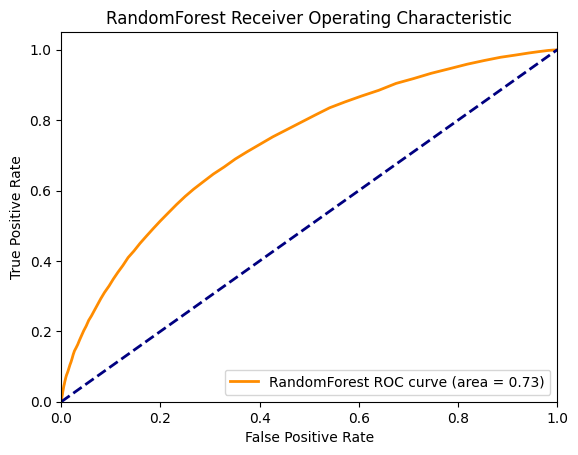

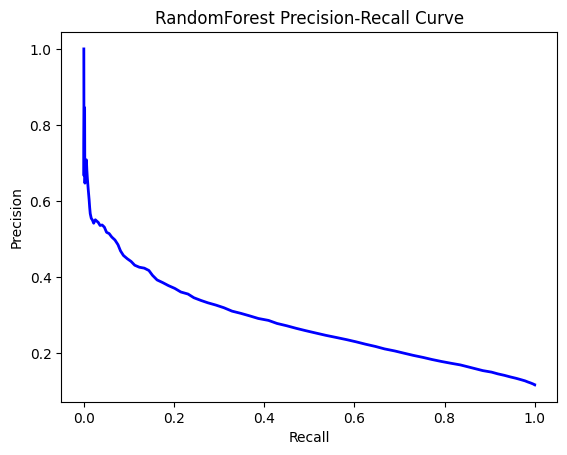

In [ ]:
# RandomForest modelini yaradırıq
model_rf = RandomForestClassifier(random_state=42)

# Modeli təlim edirik
model_rf.fit(X_train_res, y_train_res)

# Test məlumatlarında proqnozlaşdırırıq
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]

# Modeli qiymətləndiririk
print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='RandomForest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
plt.figure()
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label='RandomForest Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomForest Precision-Recall Curve')
plt.show()

# **LightGBM**

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 158013, number of negative: 158013
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6116
[LightGBM] [Info] Number of data points in the train set: 316026, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Accuracy: 0.8860126623588539

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67681
           1       0.58      0.08      0.13      8924

    accuracy                           0.89     76605
   macro avg       0.74      0.53      0.54     76605
weighted avg       0.85      0.89      0.85     76605



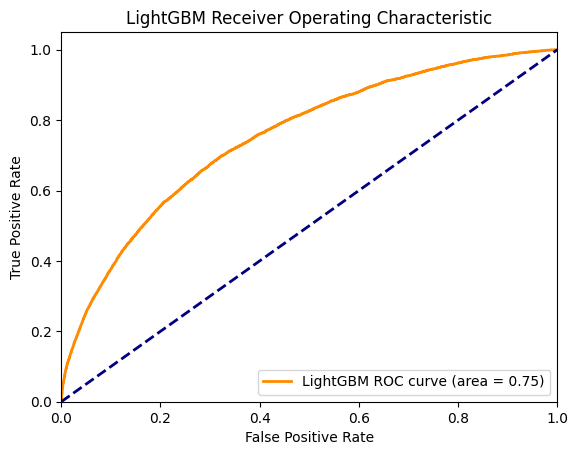

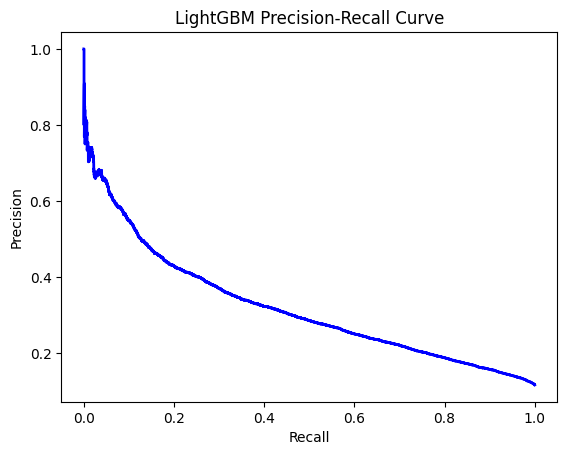

In [ ]:
# LightGBM modelini yaradırıq
model_lgb = lgb.LGBMClassifier(random_state=42)

# Modeli təlim edirik
model_lgb.fit(X_train_res, y_train_res)

# Test məlumatlarında proqnozlaşdırırıq
y_pred_lgb = model_lgb.predict(X_test)
y_pred_proba_lgb = model_lgb.predict_proba(X_test)[:, 1]

# Modeli qiymətləndiririk
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

# ROC Curve
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_proba_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)

plt.figure()
plt.plot(fpr_lgb, tpr_lgb, color='darkorange', lw=2, label='LightGBM ROC curve (area = %0.2f)' % roc_auc_lgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_pred_proba_lgb)
plt.figure()
plt.plot(recall_lgb, precision_lgb, color='blue', lw=2, label='LightGBM Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM Precision-Recall Curve')
plt.show()


# **XGBoost**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:17:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8846289406696691

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67681
           1       0.53      0.09      0.16      8924

    accuracy                           0.88     76605
   macro avg       0.71      0.54      0.55     76605
weighted avg       0.85      0.88      0.85     76605



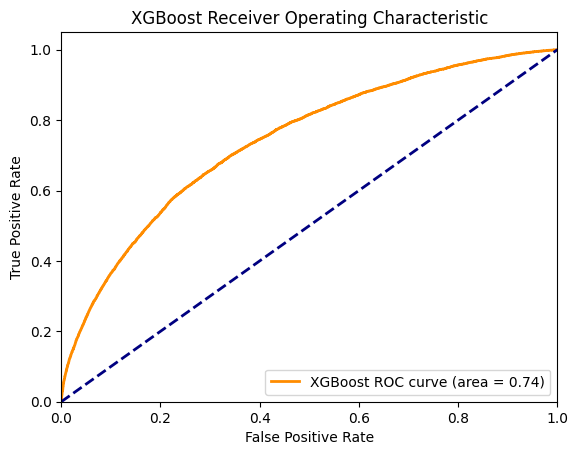

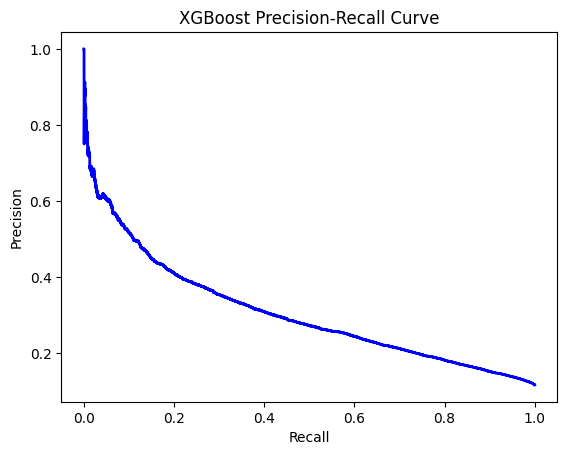

In [ ]:
# XGBoost modelini yaradırıq
model_xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Modeli təlim edirik
model_xgb.fit(X_train_res, y_train_res)

# Test məlumatlarında proqnozlaşdırırıq
y_pred_xgb = model_xgb.predict(X_test)
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Modeli qiymətləndiririk
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
plt.figure()
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2, label='XGBoost Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.show()


# **Optuna ilə modellər**

# **Logistic Optuna ilə**

[I 2024-08-31 14:21:51,448] A new study created in memory with name: no-name-e6e384ce-e29b-401d-9b5a-f28b8d6dc61b
<ipython-input-19-47cd14a1ee45>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
[I 2024-08-31 14:21:52,975] Trial 0 finished with value: 0.6941061288427648 and parameters: {'C': 0.46026012447640274, 'penalty': 'l2'}. Best is trial 0 with value: 0.6941061288427648.
<ipython-input-19-47cd14a1ee45>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
[I 2024-08-31 14:21:53,639] Trial 1 finished with value: 0.610364858690686 and parameters: {'C': 9.368778626768194e-05, 'penalt


Best Accuracy for Logistic Regression: 0.6941322367991646
Best Precision for Logistic Regression: 0.22852651671095475
Best Recall for Logistic Regression: 0.6842223218287763
Best F1-Score for Logistic Regression: 0.342619869259041
Best ROC-AUC for Logistic Regression: 0.7570264084133818


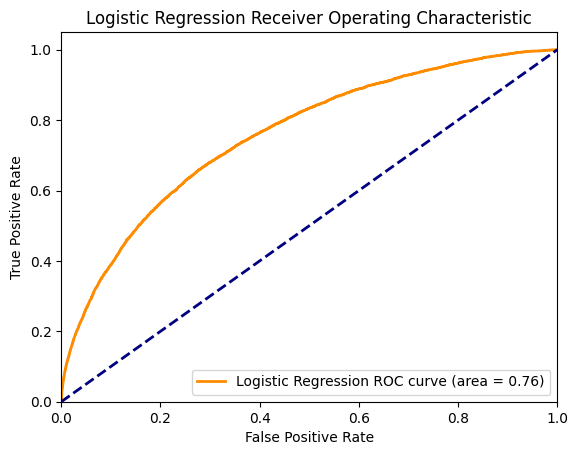

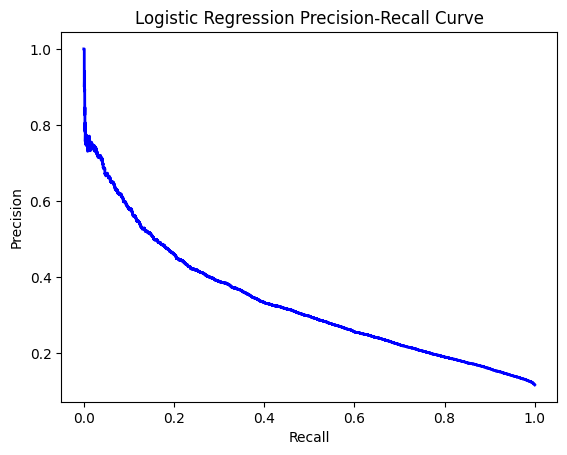

In [ ]:
def objective_lr(trial):
    # Hiperparametrlərin seçilməsi
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

    # Modelin yaradılması və təlimi
    model_lr = LogisticRegression(penalty=penalty, C=C, solver='liblinear', random_state=42)
    model_lr.fit(X_train_res, y_train_res)
    y_pred_lr = model_lr.predict(X_test)
    y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]

    # Accuracy metrikini qaytarırıq
    return accuracy_score(y_test, y_pred_lr)

# Optuna ilə tuning
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=30)

# Ən yaxşı parametrlər və modelin təlimi
best_params_lr = study_lr.best_params
model_lr_best = LogisticRegression(**best_params_lr, solver='liblinear', random_state=42)
model_lr_best.fit(X_train_res, y_train_res)

# Ən yaxşı modelin proqnozları
y_pred_lr_best = model_lr_best.predict(X_test)
y_pred_proba_lr_best = model_lr_best.predict_proba(X_test)[:, 1]

# Metriklərin hesablanması
accuracy_best_lr = accuracy_score(y_test, y_pred_lr_best)
precision_best_lr = precision_score(y_test, y_pred_lr_best)
recall_best_lr = recall_score(y_test, y_pred_lr_best)
f1_best_lr = f1_score(y_test, y_pred_lr_best)
roc_auc_best_lr = roc_auc_score(y_test, y_pred_proba_lr_best)
precision_lr_best, recall_lr_best, _ = precision_recall_curve(y_test, y_pred_proba_lr_best)

# Metriklərin çap edilməsi
print("\nBest Accuracy for Logistic Regression:", accuracy_best_lr)
print("Best Precision for Logistic Regression:", precision_best_lr)
print("Best Recall for Logistic Regression:", recall_best_lr)
print("Best F1-Score for Logistic Regression:", f1_best_lr)
print("Best ROC-AUC for Logistic Regression:", roc_auc_best_lr)

# ROC Curve
plt.figure()
plt.plot(*roc_curve(y_test, y_pred_proba_lr_best)[:2], color='darkorange', lw=2, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc_best_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
plt.figure()
plt.plot(recall_lr_best, precision_lr_best, color='blue', lw=2, label='Logistic Regression Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.show()


# **RandomForest Optuna ilə**

In [ ]:
# Optuna məqsəd funksiyası (objective function)
def objective_rf(trial):
    # Hiperparametrlərin seçilməsi
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Modelin yaradılması və təlimi
    model_rf = RandomForestClassifier(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      random_state=42)

    model_rf.fit(X_train_res, y_train_res)
    y_pred_rf = model_rf.predict(X_test)

    # Sadəcə accuracy metrikini qaytarırıq
    return accuracy_score(y_test, y_pred_rf)

# Optuna ilə tuning
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=30)

# Ən yaxşı parametrlər və modelin təlimi
best_params = study_rf.best_params
model_rf_best = RandomForestClassifier(**best_params, random_state=42)
model_rf_best.fit(X_train_res, y_train_res)

# Ən yaxşı modelin proqnozları
y_pred_rf_best = model_rf_best.predict(X_test)
y_pred_proba_rf_best = model_rf_best.predict_proba(X_test)[:, 1]

# Metriklərin hesablanması
accuracy_best = accuracy_score(y_test, y_pred_rf_best)
precision_best = precision_score(y_test, y_pred_rf_best)
recall_best = recall_score(y_test, y_pred_rf_best)
f1_best = f1_score(y_test, y_pred_rf_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_rf_best)
precision_rf_best, recall_rf_best, _ = precision_recall_curve(y_test, y_pred_proba_rf_best)


[I 2024-08-31 14:25:04,821] A new study created in memory with name: no-name-f9169e11-08bc-4bc3-b7bb-9d14f0ac00cc
[I 2024-08-31 14:26:25,524] Trial 0 finished with value: 0.852176750864826 and parameters: {'n_estimators': 53, 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.852176750864826.
[I 2024-08-31 14:30:00,827] Trial 1 finished with value: 0.8464721623914888 and parameters: {'n_estimators': 149, 'max_depth': 45, 'min_samples_split': 16, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.852176750864826.
[I 2024-08-31 14:32:44,763] Trial 2 finished with value: 0.836733894654396 and parameters: {'n_estimators': 113, 'max_depth': 19, 'min_samples_split': 19, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.852176750864826.
[I 2024-08-31 14:35:06,430] Trial 3 finished with value: 0.8586123621173553 and parameters: {'n_estimators': 84, 'max_depth': 39, 'min_samples_split': 15, 'min_samples_leaf': 7}. Best is trial 3 with value: 0

In [ ]:
# Metriklərin hesablanması
accuracy_best_rf = accuracy_score(y_test, y_pred_rf_best)
precision_best_rf = precision_score(y_test, y_pred_rf_best)
recall_best_rf = recall_score(y_test, y_pred_rf_best)
f1_best_rf = f1_score(y_test, y_pred_rf_best)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_proba_rf_best)
precision_rf_best, recall_rf_best, _ = precision_recall_curve(y_test, y_pred_proba_rf_best)
# Metriklərin çap edilməsi
print("\nBest Accuracy for RandomForest:", accuracy_best_rf)
print("Best Precision for RandomForest:", precision_best_rf)
print("Best Recall for RandomForest:", recall_best_rf)
print("Best F1-Score for RandomForest:", f1_best_rf)
print("Best ROC-AUC for RandomForest:", roc_auc_best_rf)


Best Accuracy for RandomForest: 0.8717968800992102
Best Precision for RandomForest: 0.39313795568263044
Best Recall for RandomForest: 0.18489466606902735
Best F1-Score for RandomForest: 0.2515052206386708
Best ROC-AUC for RandomForest: 0.7334610471046541


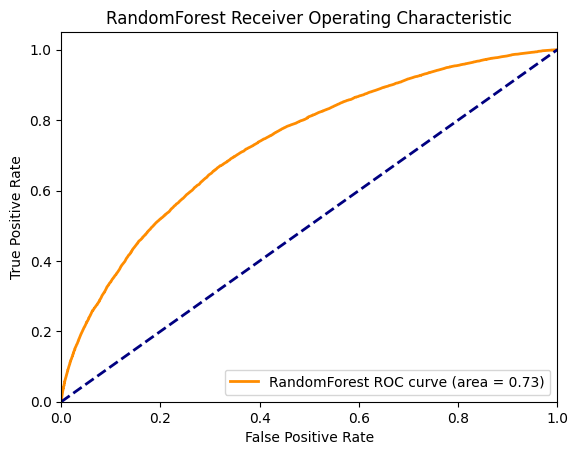

In [ ]:
# ROC Curve
plt.figure()
from sklearn.metrics import roc_curve # Importing the missing roc_curve function
plt.plot(*roc_curve(y_test, y_pred_proba_rf_best)[:2], color='darkorange', lw=2, label='RandomForest ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

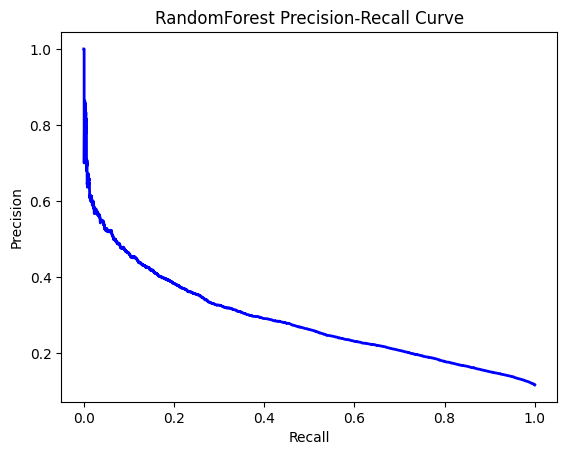

In [ ]:
# Precision-Recall Curve
plt.figure()
plt.plot(recall_rf_best, precision_rf_best, color='blue', lw=2, label='RandomForest Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('RandomForest Precision-Recall Curve')
plt.show()

# **LightGBM optuna ilə**

[I 2024-08-31 16:48:39,191] A new study created in memory with name: no-name-8bd137aa-1edc-40b2-b1d8-0f7835dc74b7


[LightGBM] [Warning] feature_fraction is set=0.6410068746912572, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6410068746912572
[LightGBM] [Warning] lambda_l2 is set=2.8427895543997685, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8427895543997685
[LightGBM] [Warning] lambda_l1 is set=4.788491265693842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.788491265693842
[LightGBM] [Warning] bagging_fraction is set=0.7144881576505668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7144881576505668
[LightGBM] [Warning] feature_fraction is set=0.6410068746912572, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6410068746912572
[LightGBM] [Warning] lambda_l2 is set=2.8427895543997685, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8427895543997685
[LightGBM] [Warning] lambda_l1 is set=4.788491265693842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.788491265693842
[LightGBM] [War

[I 2024-08-31 16:48:47,642] Trial 0 finished with value: 0.747738279182198 and parameters: {'n_estimators': 120, 'max_depth': 5, 'learning_rate': 0.2595946650955302, 'num_leaves': 108, 'feature_fraction': 0.6410068746912572, 'bagging_fraction': 0.7144881576505668, 'lambda_l1': 4.788491265693842, 'lambda_l2': 2.8427895543997685}. Best is trial 0 with value: 0.747738279182198.


[LightGBM] [Warning] feature_fraction is set=0.674312650246095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.674312650246095
[LightGBM] [Warning] lambda_l2 is set=7.283029928781019, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.283029928781019
[LightGBM] [Warning] lambda_l1 is set=7.748053513611804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.748053513611804
[LightGBM] [Warning] bagging_fraction is set=0.7410067136214242, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7410067136214242
[LightGBM] [Warning] feature_fraction is set=0.674312650246095, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.674312650246095
[LightGBM] [Warning] lambda_l2 is set=7.283029928781019, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.283029928781019
[LightGBM] [Warning] lambda_l1 is set=7.748053513611804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.748053513611804
[LightGBM] [Warning] ba

[I 2024-08-31 16:48:58,364] Trial 1 finished with value: 0.7493922616427363 and parameters: {'n_estimators': 188, 'max_depth': 4, 'learning_rate': 0.09306542809874677, 'num_leaves': 46, 'feature_fraction': 0.674312650246095, 'bagging_fraction': 0.7410067136214242, 'lambda_l1': 7.748053513611804, 'lambda_l2': 7.283029928781019}. Best is trial 1 with value: 0.7493922616427363.


[LightGBM] [Warning] feature_fraction is set=0.981377263924665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.981377263924665
[LightGBM] [Warning] lambda_l2 is set=4.4791086372096425, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.4791086372096425
[LightGBM] [Warning] lambda_l1 is set=5.53027617565556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.53027617565556
[LightGBM] [Warning] bagging_fraction is set=0.5022108347004338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5022108347004338
[LightGBM] [Warning] feature_fraction is set=0.981377263924665, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.981377263924665
[LightGBM] [Warning] lambda_l2 is set=4.4791086372096425, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.4791086372096425
[LightGBM] [Warning] lambda_l1 is set=5.53027617565556, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.53027617565556
[LightGBM] [Warning] ba

[I 2024-08-31 16:49:05,328] Trial 2 finished with value: 0.7471867855765032 and parameters: {'n_estimators': 78, 'max_depth': 7, 'learning_rate': 0.1417873444743254, 'num_leaves': 126, 'feature_fraction': 0.981377263924665, 'bagging_fraction': 0.5022108347004338, 'lambda_l1': 5.53027617565556, 'lambda_l2': 4.4791086372096425}. Best is trial 1 with value: 0.7493922616427363.


[LightGBM] [Warning] feature_fraction is set=0.6276386128233193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6276386128233193
[LightGBM] [Warning] lambda_l2 is set=5.537186767044812, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.537186767044812
[LightGBM] [Warning] lambda_l1 is set=1.4874271458102395, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4874271458102395
[LightGBM] [Warning] bagging_fraction is set=0.9128780576809359, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9128780576809359
[LightGBM] [Warning] feature_fraction is set=0.6276386128233193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6276386128233193
[LightGBM] [Warning] lambda_l2 is set=5.537186767044812, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.537186767044812
[LightGBM] [Warning] lambda_l1 is set=1.4874271458102395, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4874271458102395
[LightGBM] [War

[I 2024-08-31 16:49:16,495] Trial 3 finished with value: 0.7487080313505143 and parameters: {'n_estimators': 190, 'max_depth': 4, 'learning_rate': 0.09313423038490716, 'num_leaves': 142, 'feature_fraction': 0.6276386128233193, 'bagging_fraction': 0.9128780576809359, 'lambda_l1': 1.4874271458102395, 'lambda_l2': 5.537186767044812}. Best is trial 1 with value: 0.7493922616427363.


[LightGBM] [Warning] feature_fraction is set=0.9990070318470383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9990070318470383
[LightGBM] [Warning] lambda_l2 is set=8.517380782641178, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.517380782641178
[LightGBM] [Warning] lambda_l1 is set=7.9931918771092185, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.9931918771092185
[LightGBM] [Warning] bagging_fraction is set=0.6949710451788179, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6949710451788179
[LightGBM] [Warning] feature_fraction is set=0.9990070318470383, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9990070318470383
[LightGBM] [Warning] lambda_l2 is set=8.517380782641178, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.517380782641178
[LightGBM] [Warning] lambda_l1 is set=7.9931918771092185, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.9931918771092185
[LightGBM] [War

[I 2024-08-31 16:49:36,856] Trial 4 finished with value: 0.7473483689942597 and parameters: {'n_estimators': 184, 'max_depth': 10, 'learning_rate': 0.036690380303573494, 'num_leaves': 131, 'feature_fraction': 0.9990070318470383, 'bagging_fraction': 0.6949710451788179, 'lambda_l1': 7.9931918771092185, 'lambda_l2': 8.517380782641178}. Best is trial 1 with value: 0.7493922616427363.


[LightGBM] [Warning] feature_fraction is set=0.6766823247985734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6766823247985734
[LightGBM] [Warning] lambda_l2 is set=3.8717931747616263, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8717931747616263
[LightGBM] [Warning] lambda_l1 is set=3.2438986841232573, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2438986841232573
[LightGBM] [Warning] bagging_fraction is set=0.5827015595073435, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5827015595073435
[LightGBM] [Warning] feature_fraction is set=0.6766823247985734, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6766823247985734
[LightGBM] [Warning] lambda_l2 is set=3.8717931747616263, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8717931747616263
[LightGBM] [Warning] lambda_l1 is set=3.2438986841232573, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2438986841232573
[LightGBM] 

[I 2024-08-31 16:49:45,919] Trial 5 finished with value: 0.7439908614721058 and parameters: {'n_estimators': 99, 'max_depth': 8, 'learning_rate': 0.22152337542966224, 'num_leaves': 91, 'feature_fraction': 0.6766823247985734, 'bagging_fraction': 0.5827015595073435, 'lambda_l1': 3.2438986841232573, 'lambda_l2': 3.8717931747616263}. Best is trial 1 with value: 0.7493922616427363.


[LightGBM] [Warning] feature_fraction is set=0.9776421109229436, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9776421109229436
[LightGBM] [Warning] lambda_l2 is set=2.2965902601049515, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2965902601049515
[LightGBM] [Warning] lambda_l1 is set=6.451651463603826, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.451651463603826
[LightGBM] [Warning] bagging_fraction is set=0.9917306636418777, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9917306636418777
[LightGBM] [Warning] feature_fraction is set=0.9776421109229436, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9776421109229436
[LightGBM] [Warning] lambda_l2 is set=2.2965902601049515, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2965902601049515
[LightGBM] [Warning] lambda_l1 is set=6.451651463603826, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.451651463603826
[LightGBM] [War

[I 2024-08-31 16:49:52,921] Trial 6 finished with value: 0.73586552140999 and parameters: {'n_estimators': 78, 'max_depth': 5, 'learning_rate': 0.03388470788067059, 'num_leaves': 80, 'feature_fraction': 0.9776421109229436, 'bagging_fraction': 0.9917306636418777, 'lambda_l1': 6.451651463603826, 'lambda_l2': 2.2965902601049515}. Best is trial 1 with value: 0.7493922616427363.


[LightGBM] [Warning] feature_fraction is set=0.7022285792461482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7022285792461482
[LightGBM] [Warning] lambda_l2 is set=4.9164725622716166, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.9164725622716166
[LightGBM] [Warning] lambda_l1 is set=6.185494556827917, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.185494556827917
[LightGBM] [Warning] bagging_fraction is set=0.6504419748395553, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6504419748395553
[LightGBM] [Warning] feature_fraction is set=0.7022285792461482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7022285792461482
[LightGBM] [Warning] lambda_l2 is set=4.9164725622716166, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.9164725622716166
[LightGBM] [Warning] lambda_l1 is set=6.185494556827917, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.185494556827917
[LightGBM] [War

[I 2024-08-31 16:50:03,810] Trial 7 finished with value: 0.7476638717352506 and parameters: {'n_estimators': 117, 'max_depth': 10, 'learning_rate': 0.04575150771965807, 'num_leaves': 60, 'feature_fraction': 0.7022285792461482, 'bagging_fraction': 0.6504419748395553, 'lambda_l1': 6.185494556827917, 'lambda_l2': 4.9164725622716166}. Best is trial 1 with value: 0.7493922616427363.


[LightGBM] [Warning] feature_fraction is set=0.7307447823625094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7307447823625094
[LightGBM] [Warning] lambda_l2 is set=9.071331571620727, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.071331571620727
[LightGBM] [Warning] lambda_l1 is set=8.80163681046186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.80163681046186
[LightGBM] [Warning] bagging_fraction is set=0.5547537080750922, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5547537080750922
[LightGBM] [Warning] feature_fraction is set=0.7307447823625094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7307447823625094
[LightGBM] [Warning] lambda_l2 is set=9.071331571620727, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.071331571620727
[LightGBM] [Warning] lambda_l1 is set=8.80163681046186, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.80163681046186
[LightGBM] [Warning] ba

[I 2024-08-31 16:50:16,185] Trial 8 finished with value: 0.7446621849920558 and parameters: {'n_estimators': 194, 'max_depth': 5, 'learning_rate': 0.03277739697368865, 'num_leaves': 129, 'feature_fraction': 0.7307447823625094, 'bagging_fraction': 0.5547537080750922, 'lambda_l1': 8.80163681046186, 'lambda_l2': 9.071331571620727}. Best is trial 1 with value: 0.7493922616427363.


[LightGBM] [Warning] feature_fraction is set=0.656129442173994, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.656129442173994
[LightGBM] [Warning] lambda_l2 is set=5.4656888520504, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.4656888520504
[LightGBM] [Warning] lambda_l1 is set=7.684676699374133, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.684676699374133
[LightGBM] [Warning] bagging_fraction is set=0.9513995543073785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9513995543073785
[LightGBM] [Warning] feature_fraction is set=0.656129442173994, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.656129442173994
[LightGBM] [Warning] lambda_l2 is set=5.4656888520504, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.4656888520504
[LightGBM] [Warning] lambda_l1 is set=7.684676699374133, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.684676699374133
[LightGBM] [Warning] bagging_fr

[I 2024-08-31 16:50:22,168] Trial 9 finished with value: 0.7241671834618529 and parameters: {'n_estimators': 59, 'max_depth': 5, 'learning_rate': 0.011658642294079122, 'num_leaves': 32, 'feature_fraction': 0.656129442173994, 'bagging_fraction': 0.9513995543073785, 'lambda_l1': 7.684676699374133, 'lambda_l2': 5.4656888520504}. Best is trial 1 with value: 0.7493922616427363.


[LightGBM] [Warning] feature_fraction is set=0.8360130484289883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8360130484289883
[LightGBM] [Warning] lambda_l2 is set=7.408887293225494, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.408887293225494
[LightGBM] [Warning] lambda_l1 is set=9.86220152999773, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.86220152999773
[LightGBM] [Warning] bagging_fraction is set=0.8087947111253155, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8087947111253155
[LightGBM] [Warning] feature_fraction is set=0.8360130484289883, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8360130484289883
[LightGBM] [Warning] lambda_l2 is set=7.408887293225494, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.408887293225494
[LightGBM] [Warning] lambda_l1 is set=9.86220152999773, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.86220152999773
[LightGBM] [Warning] ba

[I 2024-08-31 16:50:29,747] Trial 10 finished with value: 0.7496770301891681 and parameters: {'n_estimators': 159, 'max_depth': 3, 'learning_rate': 0.1665968788509757, 'num_leaves': 32, 'feature_fraction': 0.8360130484289883, 'bagging_fraction': 0.8087947111253155, 'lambda_l1': 9.86220152999773, 'lambda_l2': 7.408887293225494}. Best is trial 10 with value: 0.7496770301891681.


[LightGBM] [Warning] feature_fraction is set=0.8396492099008327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8396492099008327
[LightGBM] [Warning] lambda_l2 is set=7.652054685663295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.652054685663295
[LightGBM] [Warning] lambda_l1 is set=9.819064426006818, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.819064426006818
[LightGBM] [Warning] bagging_fraction is set=0.8204037502204871, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8204037502204871
[LightGBM] [Warning] feature_fraction is set=0.8396492099008327, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8396492099008327
[LightGBM] [Warning] lambda_l2 is set=7.652054685663295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.652054685663295
[LightGBM] [Warning] lambda_l1 is set=9.819064426006818, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.819064426006818
[LightGBM] [Warning

[I 2024-08-31 16:50:38,470] Trial 11 finished with value: 0.7497459937945107 and parameters: {'n_estimators': 157, 'max_depth': 3, 'learning_rate': 0.1546431266739675, 'num_leaves': 21, 'feature_fraction': 0.8396492099008327, 'bagging_fraction': 0.8204037502204871, 'lambda_l1': 9.819064426006818, 'lambda_l2': 7.652054685663295}. Best is trial 11 with value: 0.7497459937945107.


[LightGBM] [Warning] feature_fraction is set=0.8459597937314213, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8459597937314213
[LightGBM] [Warning] lambda_l2 is set=7.184962703007148, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.184962703007148
[LightGBM] [Warning] lambda_l1 is set=9.971289339722064, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.971289339722064
[LightGBM] [Warning] bagging_fraction is set=0.8415257663865149, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8415257663865149
[LightGBM] [Warning] feature_fraction is set=0.8459597937314213, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8459597937314213
[LightGBM] [Warning] lambda_l2 is set=7.184962703007148, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.184962703007148
[LightGBM] [Warning] lambda_l1 is set=9.971289339722064, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.971289339722064
[LightGBM] [Warning

[I 2024-08-31 16:50:46,464] Trial 12 finished with value: 0.749793334355036 and parameters: {'n_estimators': 151, 'max_depth': 3, 'learning_rate': 0.1759869614212708, 'num_leaves': 21, 'feature_fraction': 0.8459597937314213, 'bagging_fraction': 0.8415257663865149, 'lambda_l1': 9.971289339722064, 'lambda_l2': 7.184962703007148}. Best is trial 12 with value: 0.749793334355036.


[LightGBM] [Warning] feature_fraction is set=0.83136579431858, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.83136579431858
[LightGBM] [Warning] lambda_l2 is set=0.6965864055322939, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6965864055322939
[LightGBM] [Warning] lambda_l1 is set=9.9641632544205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.9641632544205
[LightGBM] [Warning] bagging_fraction is set=0.8366370847554491, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8366370847554491
[LightGBM] [Warning] feature_fraction is set=0.83136579431858, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.83136579431858
[LightGBM] [Warning] lambda_l2 is set=0.6965864055322939, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6965864055322939
[LightGBM] [Warning] lambda_l1 is set=9.9641632544205, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.9641632544205
[LightGBM] [Warning] bagging_fr

[I 2024-08-31 16:50:54,292] Trial 13 finished with value: 0.7494616209531106 and parameters: {'n_estimators': 154, 'max_depth': 3, 'learning_rate': 0.18760039950421165, 'num_leaves': 25, 'feature_fraction': 0.83136579431858, 'bagging_fraction': 0.8366370847554491, 'lambda_l1': 9.9641632544205, 'lambda_l2': 0.6965864055322939}. Best is trial 12 with value: 0.749793334355036.


[LightGBM] [Warning] feature_fraction is set=0.8386271702055658, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8386271702055658
[LightGBM] [Warning] lambda_l2 is set=7.0846190146548045, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.0846190146548045
[LightGBM] [Warning] lambda_l1 is set=0.4006915810972078, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4006915810972078
[LightGBM] [Warning] bagging_fraction is set=0.8566005197529841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8566005197529841
[LightGBM] [Warning] feature_fraction is set=0.8386271702055658, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8386271702055658
[LightGBM] [Warning] lambda_l2 is set=7.0846190146548045, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.0846190146548045
[LightGBM] [Warning] lambda_l1 is set=0.4006915810972078, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4006915810972078
[LightGBM] 

[I 2024-08-31 16:51:02,739] Trial 14 finished with value: 0.7488936219772946 and parameters: {'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.2926345934783504, 'num_leaves': 58, 'feature_fraction': 0.8386271702055658, 'bagging_fraction': 0.8566005197529841, 'lambda_l1': 0.4006915810972078, 'lambda_l2': 7.0846190146548045}. Best is trial 12 with value: 0.749793334355036.


[LightGBM] [Warning] feature_fraction is set=0.8998723257654082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8998723257654082
[LightGBM] [Warning] lambda_l2 is set=9.702009280703736, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702009280703736
[LightGBM] [Warning] lambda_l1 is set=8.835313413733346, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.835313413733346
[LightGBM] [Warning] bagging_fraction is set=0.7969833207549575, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7969833207549575
[LightGBM] [Warning] feature_fraction is set=0.8998723257654082, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8998723257654082
[LightGBM] [Warning] lambda_l2 is set=9.702009280703736, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.702009280703736
[LightGBM] [Warning] lambda_l1 is set=8.835313413733346, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.835313413733346
[LightGBM] [Warning

[I 2024-08-31 16:51:12,978] Trial 15 finished with value: 0.7504363566868861 and parameters: {'n_estimators': 142, 'max_depth': 7, 'learning_rate': 0.13040812230599047, 'num_leaves': 20, 'feature_fraction': 0.8998723257654082, 'bagging_fraction': 0.7969833207549575, 'lambda_l1': 8.835313413733346, 'lambda_l2': 9.702009280703736}. Best is trial 15 with value: 0.7504363566868861.


[LightGBM] [Warning] feature_fraction is set=0.5368660496734441, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5368660496734441
[LightGBM] [Warning] lambda_l2 is set=9.966849886901521, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.966849886901521
[LightGBM] [Warning] lambda_l1 is set=3.9092557040463927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9092557040463927
[LightGBM] [Warning] bagging_fraction is set=0.7777970969934412, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7777970969934412
[LightGBM] [Warning] feature_fraction is set=0.5368660496734441, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5368660496734441
[LightGBM] [Warning] lambda_l2 is set=9.966849886901521, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.966849886901521
[LightGBM] [Warning] lambda_l1 is set=3.9092557040463927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9092557040463927
[LightGBM] [War

[I 2024-08-31 16:51:23,613] Trial 16 finished with value: 0.7500072534884643 and parameters: {'n_estimators': 135, 'max_depth': 8, 'learning_rate': 0.10470652038944878, 'num_leaves': 52, 'feature_fraction': 0.5368660496734441, 'bagging_fraction': 0.7777970969934412, 'lambda_l1': 3.9092557040463927, 'lambda_l2': 9.966849886901521}. Best is trial 15 with value: 0.7504363566868861.


[LightGBM] [Warning] feature_fraction is set=0.5110905253829905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5110905253829905
[LightGBM] [Warning] lambda_l2 is set=9.809660133072228, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.809660133072228
[LightGBM] [Warning] lambda_l1 is set=3.5453541172828844, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5453541172828844
[LightGBM] [Warning] bagging_fraction is set=0.7765618877203313, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7765618877203313
[LightGBM] [Warning] feature_fraction is set=0.5110905253829905, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5110905253829905
[LightGBM] [Warning] lambda_l2 is set=9.809660133072228, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.809660133072228
[LightGBM] [Warning] lambda_l1 is set=3.5453541172828844, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5453541172828844
[LightGBM] [War

[I 2024-08-31 16:51:34,025] Trial 17 finished with value: 0.7502326083317359 and parameters: {'n_estimators': 132, 'max_depth': 8, 'learning_rate': 0.10949558921185386, 'num_leaves': 46, 'feature_fraction': 0.5110905253829905, 'bagging_fraction': 0.7765618877203313, 'lambda_l1': 3.5453541172828844, 'lambda_l2': 9.809660133072228}. Best is trial 15 with value: 0.7504363566868861.


[LightGBM] [Warning] feature_fraction is set=0.5674235226600144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5674235226600144
[LightGBM] [Warning] lambda_l2 is set=9.466319495439238, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.466319495439238
[LightGBM] [Warning] lambda_l1 is set=2.4097055682185244, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4097055682185244
[LightGBM] [Warning] bagging_fraction is set=0.6584524655831113, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6584524655831113
[LightGBM] [Warning] feature_fraction is set=0.5674235226600144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5674235226600144
[LightGBM] [Warning] lambda_l2 is set=9.466319495439238, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.466319495439238
[LightGBM] [Warning] lambda_l1 is set=2.4097055682185244, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.4097055682185244
[LightGBM] [War

[I 2024-08-31 16:51:43,791] Trial 18 finished with value: 0.7482465879580329 and parameters: {'n_estimators': 101, 'max_depth': 8, 'learning_rate': 0.12424811652980253, 'num_leaves': 76, 'feature_fraction': 0.5674235226600144, 'bagging_fraction': 0.6584524655831113, 'lambda_l1': 2.4097055682185244, 'lambda_l2': 9.466319495439238}. Best is trial 15 with value: 0.7504363566868861.


[LightGBM] [Warning] feature_fraction is set=0.9070066046907705, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9070066046907705
[LightGBM] [Warning] lambda_l2 is set=8.428806234416877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.428806234416877
[LightGBM] [Warning] lambda_l1 is set=4.3278981551798665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.3278981551798665
[LightGBM] [Warning] bagging_fraction is set=0.7679630427774785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7679630427774785
[LightGBM] [Warning] feature_fraction is set=0.9070066046907705, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9070066046907705
[LightGBM] [Warning] lambda_l2 is set=8.428806234416877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.428806234416877
[LightGBM] [Warning] lambda_l1 is set=4.3278981551798665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.3278981551798665
[LightGBM] [War

[I 2024-08-31 16:51:53,344] Trial 19 finished with value: 0.7464262222936029 and parameters: {'n_estimators': 134, 'max_depth': 7, 'learning_rate': 0.2059584807557023, 'num_leaves': 44, 'feature_fraction': 0.9070066046907705, 'bagging_fraction': 0.7679630427774785, 'lambda_l1': 4.3278981551798665, 'lambda_l2': 8.428806234416877}. Best is trial 15 with value: 0.7504363566868861.


[LightGBM] [Warning] feature_fraction is set=0.7696687564808357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7696687564808357
[LightGBM] [Warning] lambda_l2 is set=6.465477976694911, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.465477976694911
[LightGBM] [Warning] lambda_l1 is set=2.0411132007321013, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0411132007321013
[LightGBM] [Warning] bagging_fraction is set=0.8985179594912531, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8985179594912531
[LightGBM] [Warning] feature_fraction is set=0.7696687564808357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7696687564808357
[LightGBM] [Warning] lambda_l2 is set=6.465477976694911, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.465477976694911
[LightGBM] [Warning] lambda_l1 is set=2.0411132007321013, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0411132007321013
[LightGBM] [War

[I 2024-08-31 16:52:09,787] Trial 20 finished with value: 0.7489388598374433 and parameters: {'n_estimators': 171, 'max_depth': 9, 'learning_rate': 0.06822355521769102, 'num_leaves': 67, 'feature_fraction': 0.7696687564808357, 'bagging_fraction': 0.8985179594912531, 'lambda_l1': 2.0411132007321013, 'lambda_l2': 6.465477976694911}. Best is trial 15 with value: 0.7504363566868861.


[LightGBM] [Warning] feature_fraction is set=0.5140903780867644, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5140903780867644
[LightGBM] [Warning] lambda_l2 is set=9.959236194771165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.959236194771165
[LightGBM] [Warning] lambda_l1 is set=3.7808649088346837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7808649088346837
[LightGBM] [Warning] bagging_fraction is set=0.7731268901087335, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7731268901087335
[LightGBM] [Warning] feature_fraction is set=0.5140903780867644, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5140903780867644
[LightGBM] [Warning] lambda_l2 is set=9.959236194771165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.959236194771165
[LightGBM] [Warning] lambda_l1 is set=3.7808649088346837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7808649088346837
[LightGBM] [War

[I 2024-08-31 16:52:18,897] Trial 21 finished with value: 0.7496532266275036 and parameters: {'n_estimators': 129, 'max_depth': 8, 'learning_rate': 0.11119654920548148, 'num_leaves': 49, 'feature_fraction': 0.5140903780867644, 'bagging_fraction': 0.7731268901087335, 'lambda_l1': 3.7808649088346837, 'lambda_l2': 9.959236194771165}. Best is trial 15 with value: 0.7504363566868861.


[LightGBM] [Warning] feature_fraction is set=0.5017483305859354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5017483305859354
[LightGBM] [Warning] lambda_l2 is set=9.780631411378213, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.780631411378213
[LightGBM] [Warning] lambda_l1 is set=3.2421073296240315, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2421073296240315
[LightGBM] [Warning] bagging_fraction is set=0.7733884938780938, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7733884938780938
[LightGBM] [Warning] feature_fraction is set=0.5017483305859354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5017483305859354
[LightGBM] [Warning] lambda_l2 is set=9.780631411378213, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.780631411378213
[LightGBM] [Warning] lambda_l1 is set=3.2421073296240315, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2421073296240315
[LightGBM] [War

[I 2024-08-31 16:52:29,884] Trial 22 finished with value: 0.7506465058606631 and parameters: {'n_estimators': 138, 'max_depth': 9, 'learning_rate': 0.07703849223154637, 'num_leaves': 39, 'feature_fraction': 0.5017483305859354, 'bagging_fraction': 0.7733884938780938, 'lambda_l1': 3.2421073296240315, 'lambda_l2': 9.780631411378213}. Best is trial 22 with value: 0.7506465058606631.


[LightGBM] [Warning] feature_fraction is set=0.5821336681261055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5821336681261055
[LightGBM] [Warning] lambda_l2 is set=8.567685870241252, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.567685870241252
[LightGBM] [Warning] lambda_l1 is set=2.883365831237358, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.883365831237358
[LightGBM] [Warning] bagging_fraction is set=0.6864064697309638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6864064697309638
[LightGBM] [Warning] feature_fraction is set=0.5821336681261055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5821336681261055
[LightGBM] [Warning] lambda_l2 is set=8.567685870241252, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.567685870241252
[LightGBM] [Warning] lambda_l1 is set=2.883365831237358, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.883365831237358
[LightGBM] [Warning

[I 2024-08-31 16:52:39,530] Trial 23 finished with value: 0.7488616791439362 and parameters: {'n_estimators': 104, 'max_depth': 9, 'learning_rate': 0.07759391437875232, 'num_leaves': 35, 'feature_fraction': 0.5821336681261055, 'bagging_fraction': 0.6864064697309638, 'lambda_l1': 2.883365831237358, 'lambda_l2': 8.567685870241252}. Best is trial 22 with value: 0.7506465058606631.


[LightGBM] [Warning] feature_fraction is set=0.5050200731250652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5050200731250652
[LightGBM] [Warning] lambda_l2 is set=9.26812122858669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.26812122858669
[LightGBM] [Warning] lambda_l1 is set=1.287861213071627, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.287861213071627
[LightGBM] [Warning] bagging_fraction is set=0.8850284858829833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8850284858829833
[LightGBM] [Warning] feature_fraction is set=0.5050200731250652, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5050200731250652
[LightGBM] [Warning] lambda_l2 is set=9.26812122858669, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.26812122858669
[LightGBM] [Warning] lambda_l1 is set=1.287861213071627, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.287861213071627
[LightGBM] [Warning] ba

[I 2024-08-31 16:52:49,249] Trial 24 finished with value: 0.7506117748797188 and parameters: {'n_estimators': 140, 'max_depth': 9, 'learning_rate': 0.1342041130144913, 'num_leaves': 38, 'feature_fraction': 0.5050200731250652, 'bagging_fraction': 0.8850284858829833, 'lambda_l1': 1.287861213071627, 'lambda_l2': 9.26812122858669}. Best is trial 22 with value: 0.7506465058606631.


[LightGBM] [Warning] feature_fraction is set=0.6014956941752503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6014956941752503
[LightGBM] [Warning] lambda_l2 is set=8.723911655623443, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.723911655623443
[LightGBM] [Warning] lambda_l1 is set=0.12374507697074799, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12374507697074799
[LightGBM] [Warning] bagging_fraction is set=0.8615355363093016, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8615355363093016
[LightGBM] [Warning] feature_fraction is set=0.6014956941752503, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6014956941752503
[LightGBM] [Warning] lambda_l2 is set=8.723911655623443, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.723911655623443
[LightGBM] [Warning] lambda_l1 is set=0.12374507697074799, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12374507697074799
[LightGBM] 

[I 2024-08-31 16:53:04,295] Trial 25 finished with value: 0.7460268499539701 and parameters: {'n_estimators': 173, 'max_depth': 9, 'learning_rate': 0.1376772887988837, 'num_leaves': 96, 'feature_fraction': 0.6014956941752503, 'bagging_fraction': 0.8615355363093016, 'lambda_l1': 0.12374507697074799, 'lambda_l2': 8.723911655623443}. Best is trial 22 with value: 0.7506465058606631.


[LightGBM] [Warning] feature_fraction is set=0.8923793886040552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8923793886040552
[LightGBM] [Warning] lambda_l2 is set=6.3617042318385435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.3617042318385435
[LightGBM] [Warning] lambda_l1 is set=1.319269036838763, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.319269036838763
[LightGBM] [Warning] bagging_fraction is set=0.8923535771298889, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8923535771298889
[LightGBM] [Warning] feature_fraction is set=0.8923793886040552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8923793886040552
[LightGBM] [Warning] lambda_l2 is set=6.3617042318385435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.3617042318385435
[LightGBM] [Warning] lambda_l1 is set=1.319269036838763, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.319269036838763
[LightGBM] [War

[I 2024-08-31 16:53:14,783] Trial 26 finished with value: 0.7479834076873573 and parameters: {'n_estimators': 146, 'max_depth': 6, 'learning_rate': 0.05895215330424765, 'num_leaves': 37, 'feature_fraction': 0.8923793886040552, 'bagging_fraction': 0.8923535771298889, 'lambda_l1': 1.319269036838763, 'lambda_l2': 6.3617042318385435}. Best is trial 22 with value: 0.7506465058606631.


[LightGBM] [Warning] feature_fraction is set=0.5645096924173144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5645096924173144
[LightGBM] [Warning] lambda_l2 is set=7.854849942031401, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.854849942031401
[LightGBM] [Warning] lambda_l1 is set=1.0826877054870852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0826877054870852
[LightGBM] [Warning] bagging_fraction is set=0.9449818293532807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9449818293532807
[LightGBM] [Warning] feature_fraction is set=0.5645096924173144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5645096924173144
[LightGBM] [Warning] lambda_l2 is set=7.854849942031401, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.854849942031401
[LightGBM] [Warning] lambda_l1 is set=1.0826877054870852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0826877054870852
[LightGBM] [War

[I 2024-08-31 16:53:27,512] Trial 27 finished with value: 0.7484581891540384 and parameters: {'n_estimators': 142, 'max_depth': 10, 'learning_rate': 0.13006805512428865, 'num_leaves': 70, 'feature_fraction': 0.5645096924173144, 'bagging_fraction': 0.9449818293532807, 'lambda_l1': 1.0826877054870852, 'lambda_l2': 7.854849942031401}. Best is trial 22 with value: 0.7506465058606631.


[LightGBM] [Warning] feature_fraction is set=0.7726024520655355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726024520655355
[LightGBM] [Warning] lambda_l2 is set=9.209763801208505, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.209763801208505
[LightGBM] [Warning] lambda_l1 is set=2.339201953021772, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.339201953021772
[LightGBM] [Warning] bagging_fraction is set=0.7387499596010697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7387499596010697
[LightGBM] [Warning] feature_fraction is set=0.7726024520655355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7726024520655355
[LightGBM] [Warning] lambda_l2 is set=9.209763801208505, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.209763801208505
[LightGBM] [Warning] lambda_l1 is set=2.339201953021772, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.339201953021772
[LightGBM] [Warning

[I 2024-08-31 16:53:37,452] Trial 28 finished with value: 0.7483648342243274 and parameters: {'n_estimators': 111, 'max_depth': 7, 'learning_rate': 0.08271395484841935, 'num_leaves': 38, 'feature_fraction': 0.7726024520655355, 'bagging_fraction': 0.7387499596010697, 'lambda_l1': 2.339201953021772, 'lambda_l2': 9.209763801208505}. Best is trial 22 with value: 0.7506465058606631.


[LightGBM] [Warning] feature_fraction is set=0.6152190868863261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6152190868863261
[LightGBM] [Warning] lambda_l2 is set=8.195392962481813, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.195392962481813
[LightGBM] [Warning] lambda_l1 is set=5.031836161842643, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.031836161842643
[LightGBM] [Warning] bagging_fraction is set=0.8044467880271629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8044467880271629
[LightGBM] [Warning] feature_fraction is set=0.6152190868863261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6152190868863261
[LightGBM] [Warning] lambda_l2 is set=8.195392962481813, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.195392962481813
[LightGBM] [Warning] lambda_l1 is set=5.031836161842643, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.031836161842643
[LightGBM] [Warning

[I 2024-08-31 16:53:51,832] Trial 29 finished with value: 0.7377914186261146 and parameters: {'n_estimators': 164, 'max_depth': 9, 'learning_rate': 0.23887772097577187, 'num_leaves': 107, 'feature_fraction': 0.6152190868863261, 'bagging_fraction': 0.8044467880271629, 'lambda_l1': 5.031836161842643, 'lambda_l2': 8.195392962481813}. Best is trial 22 with value: 0.7506465058606631.


Best parameters for LightGBM:
{'n_estimators': 138, 'max_depth': 9, 'learning_rate': 0.07703849223154637, 'num_leaves': 39, 'feature_fraction': 0.5017483305859354, 'bagging_fraction': 0.7733884938780938, 'lambda_l1': 3.2421073296240315, 'lambda_l2': 9.780631411378213}
[LightGBM] [Warning] feature_fraction is set=0.5017483305859354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5017483305859354
[LightGBM] [Warning] lambda_l2 is set=9.780631411378213, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.780631411378213
[LightGBM] [Warning] lambda_l1 is set=3.2421073296240315, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2421073296240315
[LightGBM] [Warning] bagging_fraction is set=0.7733884938780938, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7733884938780938
[LightGBM] [Warning] feature_fraction is set=0.5017483305859354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5017483305859354
[LightGBM] 

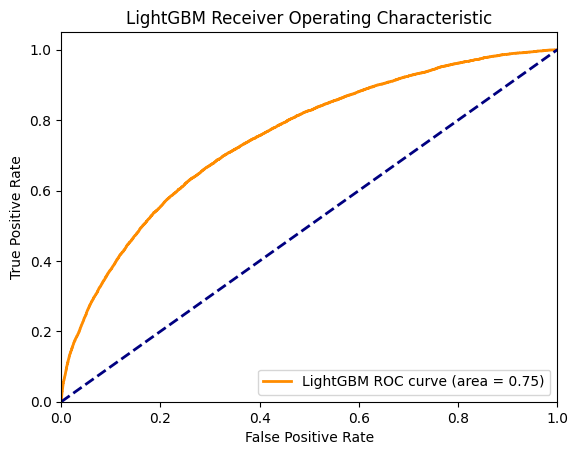

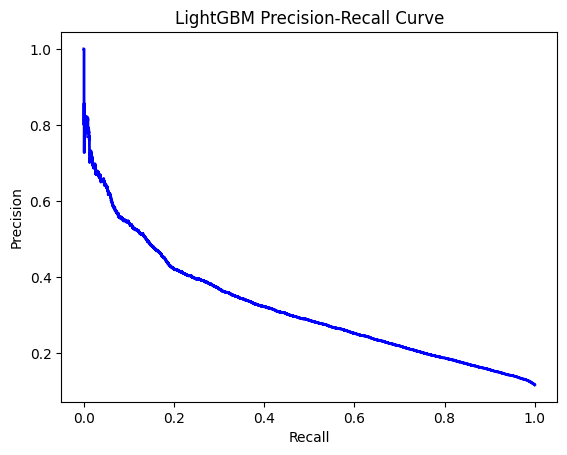

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# Optuna-nın məqsəd funksiyası (objective function)
def objective_lgb(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.0, 10.0),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0, 10.0),
        "random_state": 42,
    }

    # Modelin yaradılması
    model_lgb = lgb.LGBMClassifier(**param)
    model_lgb.fit(X_train_res, y_train_res)

    # Proqnozlar
    y_pred_lgb = model_lgb.predict(X_test)
    y_pred_proba_lgb = model_lgb.predict_proba(X_test)[:, 1]

    # Metriklərin hesablanması
    accuracy = accuracy_score(y_test, y_pred_lgb)
    precision = precision_score(y_test, y_pred_lgb)
    recall = recall_score(y_test, y_pred_lgb)
    f1 = f1_score(y_test, y_pred_lgb)
    roc_auc = roc_auc_score(y_test, y_pred_proba_lgb)

    return roc_auc  # Optuna üçün qiymətləndirilən metrik

# Optuna ilə tuning
study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective_lgb, n_trials=30)

# Ən yaxşı parametrlər
best_params = study_lgb.best_params
print("Best parameters for LightGBM:")
print(best_params)

# Ən yaxşı modeli təlim etmək
model_lgb_best = lgb.LGBMClassifier(**best_params, random_state=42)
model_lgb_best.fit(X_train_res, y_train_res)
y_pred_lgb_best = model_lgb_best.predict(X_test)
y_pred_proba_lgb_best = model_lgb_best.predict_proba(X_test)[:, 1]

# Metriklərin yenidən hesablanması
accuracy_best = accuracy_score(y_test, y_pred_lgb_best)
precision_best = precision_score(y_test, y_pred_lgb_best)
recall_best = recall_score(y_test, y_pred_lgb_best)
f1_best = f1_score(y_test, y_pred_lgb_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_lgb_best)
precision_lgb_best, recall_lgb_best, _ = precision_recall_curve(y_test, y_pred_proba_lgb_best)

# Metriklərin çap edilməsi
print("\nBest Accuracy for LightGBM:", accuracy_best)
print("Best Precision for LightGBM:", precision_best)
print("Best Recall for LightGBM:", recall_best)
print("Best F1-Score for LightGBM:", f1_best)
print("Best ROC-AUC for LightGBM:", roc_auc_best)

# ROC Curve
plt.figure()
plt.plot(*roc_curve(y_test, y_pred_proba_lgb_best)[:2], color='darkorange', lw=2, label='LightGBM ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
plt.figure()
plt.plot(recall_lgb_best, precision_lgb_best, color='blue', lw=2, label='LightGBM Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LightGBM Precision-Recall Curve')
plt.show()


# **XGBoost optuna ilə**

[I 2024-08-31 19:21:58,142] A new study created in memory with name: no-name-b1c69fcb-d2c0-4b54-ba1d-d5da99a1495c
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:21:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-08-31 19:22:04,127] Trial 0 finished with value: 0.7452933436234743 and parameters: {'n_estimators': 79, 'max_depth': 3, 'learning_rate': 0.1583742377510321, 'subsample': 0.7611082731746507, 'colsample_bytree': 0.6848327999023041, 'gamma': 1.7151381650549469}. Best is trial 0 with value: 0.7452933436234743.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:22:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-08-31 19:22:16,162] Trial 1 finished with value: 0.7483132005125609 and parameters: {'n_estimators': 151, 'max_depth': 8, 'learning_rate'

Best parameters for XGBoost:
{'n_estimators': 180, 'max_depth': 4, 'learning_rate': 0.13652597524816346, 'subsample': 0.8157553842363667, 'colsample_bytree': 0.6703867771447123, 'gamma': 0.002446114845245262}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:26:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best Accuracy for XGBoost: 0.8857515827948568
Best Precision for XGBoost: 0.5594744121715076
Best Recall for XGBoost: 0.09065441506051099
Best F1-Score for XGBoost: 0.15602700096432018
Best ROC-AUC for XGBoost: 0.7495280530396534


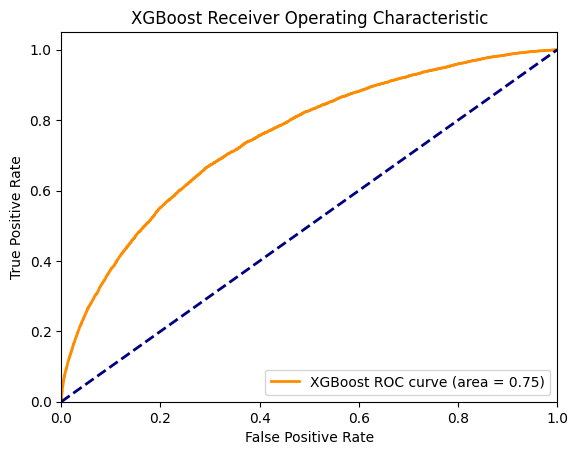

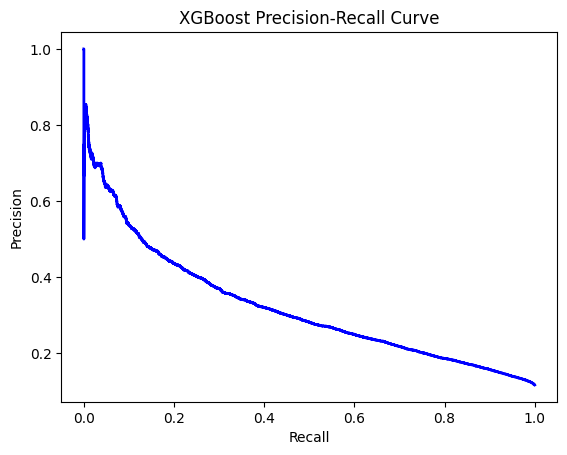

In [ ]:
# Optuna-nın məqsəd funksiyası (objective function)
def objective_xgb(trial):
    # Hiperparametrləri təyin etmək
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "random_state": 42,
        "use_label_encoder": False,
        "eval_metric": "mlogloss"
    }

    # Modelin yaradılması
    model_xgb = XGBClassifier(**param)
    model_xgb.fit(X_train_res, y_train_res)

    # Proqnozlar
    y_pred_xgb = model_xgb.predict(X_test)
    y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

    # Metriklərin hesablanması
    accuracy = accuracy_score(y_test, y_pred_xgb)
    precision = precision_score(y_test, y_pred_xgb)
    recall = recall_score(y_test, y_pred_xgb)
    f1 = f1_score(y_test, y_pred_xgb)
    roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)

    return roc_auc  # Optuna üçün qiymətləndirilən metrik

# Optuna ilə tuning
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=30)

# Ən yaxşı parametrlər
best_params = study_xgb.best_params
print("Best parameters for XGBoost:")
print(best_params)

# Ən yaxşı modeli təlim etmək
model_xgb_best = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric="mlogloss")
model_xgb_best.fit(X_train_res, y_train_res)
y_pred_xgb_best = model_xgb_best.predict(X_test)
y_pred_proba_xgb_best = model_xgb_best.predict_proba(X_test)[:, 1]

# Metriklərin yenidən hesablanması
accuracy_best = accuracy_score(y_test, y_pred_xgb_best)
precision_best = precision_score(y_test, y_pred_xgb_best)
recall_best = recall_score(y_test, y_pred_xgb_best)
f1_best = f1_score(y_test, y_pred_xgb_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_xgb_best)
precision_xgb_best, recall_xgb_best, _ = precision_recall_curve(y_test, y_pred_proba_xgb_best)

# Metriklərin çap edilməsi
print("\nBest Accuracy for XGBoost:", accuracy_best)
print("Best Precision for XGBoost:", precision_best)
print("Best Recall for XGBoost:", recall_best)
print("Best F1-Score for XGBoost:", f1_best)
print("Best ROC-AUC for XGBoost:", roc_auc_best)

# ROC Curve
plt.figure()
plt.plot(*roc_curve(y_test, y_pred_proba_xgb_best)[:2], color='darkorange', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
plt.figure()
plt.plot(recall_xgb_best, precision_xgb_best, color='blue', lw=2, label='XGBoost Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.show()


In [ ]:
import joblib
# Modeli joblib ilə save edin
joblib.dump(model_xgb_best, 'xgb_model.pkl')

# **Bar qrafik**

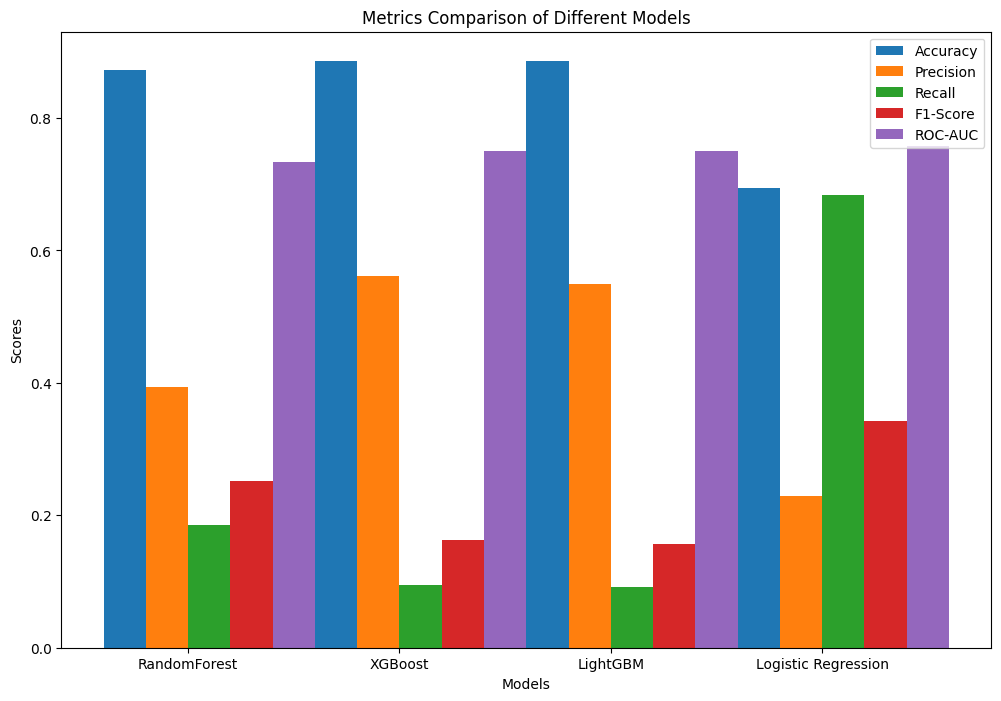

In [ ]:
# Metriklərin təyin edilməsi (örnek dəyərlər)
models = ['RandomForest', 'XGBoost', 'LightGBM', 'Logistic Regression']
accuracy = [accuracy_best_rf, accuracy_best_xgb, accuracy_best_lgb, accuracy_best_lr]
precision = [precision_best_rf, precision_best_xgb, precision_best_lgb, precision_best_lr]
recall = [recall_best_rf, recall_best_xgb, recall_best_lgb, recall_best_lr]
f1_score = [f1_best_rf, f1_best_xgb, f1_best_lgb, f1_best_lr]
roc_auc = [roc_auc_best_rf, roc_auc_best_xgb, roc_auc_best_lgb, roc_auc_best_lr]

# Bar qrafiklərin yaradılması
x = np.arange(len(models))  # Model adları üçün indekslər
width = 0.2  # Bar genişliyi

fig, ax = plt.subplots(figsize=(12, 8))

# Bar qrafiklərin yaradılması
rects1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5 * width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5 * width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5 * width, f1_score, width, label='F1-Score')
rects5 = ax.bar(x + 2.5 * width, roc_auc, width, label='ROC-AUC')

# Qrafiklərin formatlanması
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Metrics Comparison of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Qrafiklərin çap edilməsi
plt.show()

###Streamlit app

In [ ]:
import streamlit as st
import joblib  # ya da pickle
import numpy as np

# Modeli yükləyin
xgb_model = joblib.load('xgb_model.pkl')

# Streamlit interfeysi üçün başlıq
st.title("Loan Approval Prediction Using XGBoost")

# İstifadəçidən inputları toplamaq
age = st.number_input("Age", min_value=18, max_value=100, value=30)
income = st.number_input("Income ($)", min_value=0, max_value=1000000, value=50000)
loan_amount = st.number_input("Loan Amount ($)", min_value=0, max_value=1000000, value=10000)
credit_score = st.slider("Credit Score", min_value=300, max_value=850, value=650)
months_employed = st.number_input("Months Employed", min_value=0, max_value=480, value=12)
num_credit_lines = st.number_input("Number of Credit Lines", min_value=0, max_value=20, value=5)
interest_rate = st.number_input("Interest Rate (%)", min_value=0.0, max_value=100.0, value=5.0)
loan_term = st.number_input("Loan Term (months)", min_value=0, max_value=360, value=60)
dti_ratio = st.number_input("Debt-to-Income Ratio (DTI)", min_value=0.0, max_value=100.0, value=20.0)

# Education inputunu bir dəyişən kimi qəbul edin
education = st.radio("Education Level", options=['High School', 'Bachelor', 'Master', 'PhD'])

# Təhsili rəqəmlərlə kodlaşdırın
education_dict = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
education_value = education_dict[education]

# **Income Bin üçün Radio Button**
income_bin = st.radio("Income Bin", options=['Low', 'Medium', 'High'])

# Income Bin-i tək bir input kimi qəbul edin
income_bin_dict = {'Low': 0, 'Medium': 1, 'High': 2}
income_bin_value = income_bin_dict[income_bin]

lti_ratio = st.number_input("Loan-to-Income Ratio (LTI)", min_value=0.0, max_value=100.0, value=10.0)
credit_utilization = st.number_input("Credit Utilization (%)", min_value=0.0, max_value=100.0, value=30.0)

# Employment type (one-hot encoded)
employment_type = st.selectbox("Employment Type", options=['Full-time', 'Part-time', 'Self-employed', 'Unemployed'])
employment_type_part_time = 1 if employment_type == 'Part-time' else 0
employment_type_self_employed = 1 if employment_type == 'Self-employed' else 0
employment_type_unemployed = 1 if employment_type == 'Unemployed' else 0

# Marital status (one-hot encoded)
marital_status = st.selectbox("Marital Status", options=['Married', 'Single'])
marital_status_married = 1 if marital_status == 'Married' else 0
marital_status_single = 1 if marital_status == 'Single' else 0

# Has Mortgage (binary)
has_mortgage = st.selectbox("Has a Mortgage", options=['Yes', 'No'])
has_mortgage_yes = 1 if has_mortgage == 'Yes' else 0

# Has Dependents (binary)
has_dependents = st.selectbox("Has Dependents", options=['Yes', 'No'])
has_dependents_yes = 1 if has_dependents == 'Yes' else 0

# Loan Purpose (one-hot encoded)
loan_purpose = st.selectbox("Loan Purpose", options=['Business', 'Education', 'Home', 'Other'])
loan_purpose_business = 1 if loan_purpose == 'Business' else 0
loan_purpose_education = 1 if loan_purpose == 'Education' else 0
loan_purpose_home = 1 if loan_purpose == 'Home' else 0
loan_purpose_other = 1 if loan_purpose == 'Other' else 0

# İstifadəçi məlumatlarını bir araya gətirək
input_data = np.array([age, income, loan_amount, credit_score, months_employed, num_credit_lines,
                       interest_rate, loan_term, dti_ratio, education_value,  # Təhsil bir input kimi daxil edilir
                       income_bin_value,  # Income Bin bir input kimi daxil edilir
                       lti_ratio, credit_utilization, employment_type_part_time,
                       employment_type_self_employed, employment_type_unemployed,
                       marital_status_married, marital_status_single, has_mortgage_yes,
                       has_dependents_yes, loan_purpose_business, loan_purpose_education,
                       loan_purpose_home, loan_purpose_other]).reshape(1, -1)

# Proqnoz düyməsi
if st.button("Predict"):
    prediction = xgb_model.predict(input_data)

    # Nəticəni göstərmək
    st.write(f"Prediction: {'Approved' if prediction[0] == 1 else 'Denied'}")

